## 🏅Olympics Data Analysis
This project explores Summer Olympic medal data from 1976 to 2008, uncovering trends, top-performing countries, sports distribution, and medal insights. 
Goals:
- Clean and preprocess the dataset
- Perform Exploratory Data Analysis (EDA)
- Create engaging visualizations
- Train ML models for predictions (e.g., medal count)
- Highlight key findings

## Step 1 : Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import joblib
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Load and View Dataset

In [2]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='ISO-8859-1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


## Step 3 : Data Cleaning
- Check for null values
- Drop irrelevant columns if any
- Handle missing data if needed

In [3]:
df.isnull().sum()
df = df.drop(columns=["Notes"], errors='ignore')
df['Sport'] = df['Sport'].fillna("Unknown")

## Step 4 : Exploratory Data Analysis (EDA)
-  Total Medals by Country
-  Gender Distribution
-  Medals by Sport

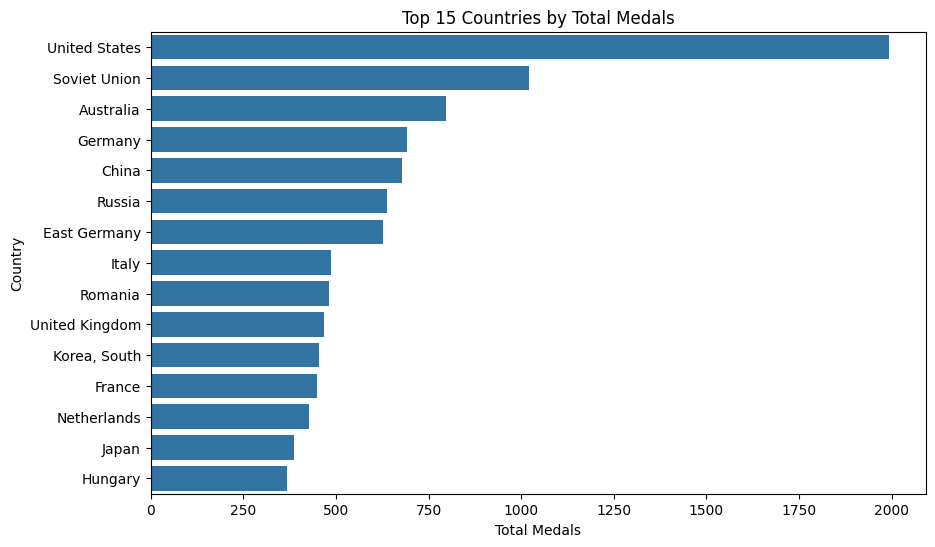

In [ ]:
# total medals by country
country_medals = df['Country'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=country_medals.values, y=country_medals.index)
plt.title("Top 15 Countries by Total Medals")
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.show()

Gender,Men,Women
Year,,
1976.0,924,381
1980.0,958,429
1984.0,973,486
1988.0,1011,535
1992.0,1105,600
1996.0,1082,777
2000.0,1126,889
2004.0,1099,899
2008.0,1110,932


C:\Users\91986\AppData\Local\Temp\ipykernel_5648\2347740427.py:26: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.

c:\Users\91986\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.



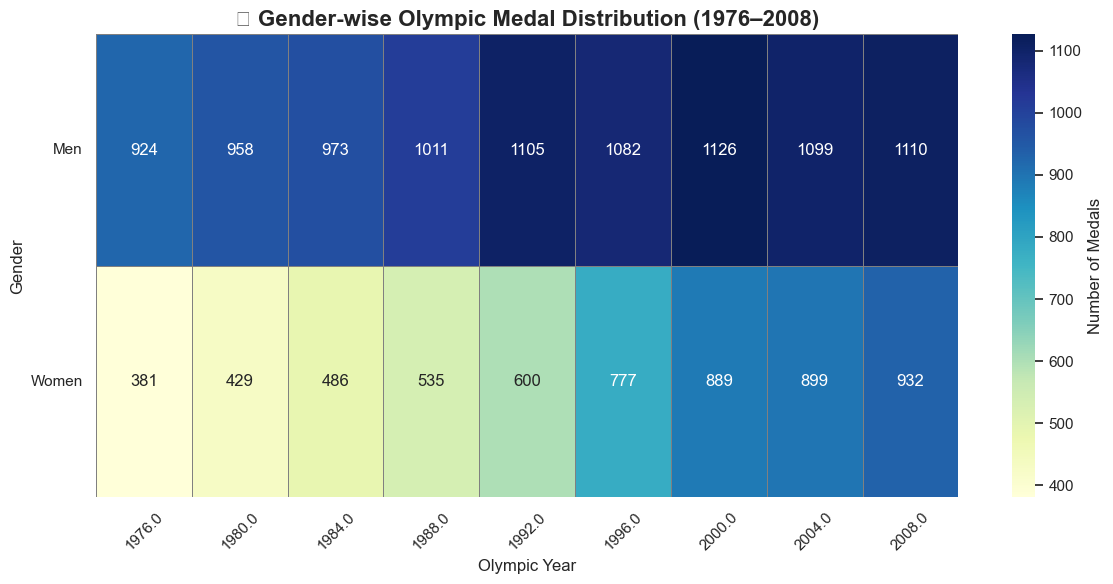

In [ ]:
# Grouping data by 'Year' and 'Gender' to get medal counts
gender_year_df = df.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

# Preview the transformed dataset
display(gender_year_df)

# Plotting heatmap to visualize medal distribution by gender over the years
plt.figure(figsize=(12, 6))
sns.set(style="white")

# Create the heatmap
sns.heatmap(gender_year_df.T, 
            annot=True, 
            fmt='d', 
            cmap='YlGnBu', 
            linewidths=0.5, 
            linecolor='gray',
            cbar_kws={'label': 'Number of Medals'})

#  Title and axis labels
plt.title("🎯 Gender-wise Olympic Medal Distribution (1976–2008)", fontsize=16, weight='bold')
plt.xlabel("Olympic Year", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# medals by sports
top_sports = df['Sport'].value_counts().head(10)
fig = px.bar(top_sports, title="Top 10 Sports by Medal Count", labels={'value': 'Medals', 'index': 'Sport'})
fig.show()

## Step 5 : Feature Engineering

In [9]:
# Copy dataset to avoid modifying original
df_fe = df.copy()

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_country = LabelEncoder()
le_sport = LabelEncoder()
le_event = LabelEncoder()
le_medal = LabelEncoder()

df_fe['Gender'] = le_gender.fit_transform(df_fe['Gender'])
df_fe['Country'] = le_country.fit_transform(df_fe['Country'])
df_fe['Sport'] = le_sport.fit_transform(df_fe['Sport'])
df_fe['Event'] = le_event.fit_transform(df_fe['Event'])
df_fe['Medal'] = le_medal.fit_transform(df_fe['Medal'])

# Display sample after encoding
df_fe.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,0,Diving,59,"KÖHLER, Christa",1,GDR,29,W,2
1,Montreal,1976.0,0,Diving,59,"KOSENKOV, Aleksandr",0,URS,95,M,0
2,Montreal,1976.0,0,Diving,59,"BOGGS, Philip George",0,USA,117,M,1
3,Montreal,1976.0,0,Diving,59,"CAGNOTTO, Giorgio Franco",0,ITA,51,M,2
4,Montreal,1976.0,0,Diving,41,"WILSON, Deborah Keplar",1,USA,117,W,0


## Step 6 :  Machine Learning: Predict Medal Type (Gold/Silver/Bronze)

In [10]:
df_ml = df.copy()
le = LabelEncoder()
df_ml['Gender'] = le.fit_transform(df_ml['Gender'])
df_ml['Sport'] = le.fit_transform(df_ml['Sport'])
df_ml['Country'] = le.fit_transform(df_ml['Country'])

X = df_ml[['Year', 'Gender', 'Sport', 'Country']]
y = df_ml['Medal']  # Medal prediction as target

X = pd.get_dummies(X)
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.4337315514446477
R2 Score: 0.36216810981208947


## Step 7 : Feature Importance

C:\Users\91986\AppData\Local\Temp\ipykernel_5648\1065939273.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\91986\AppData\Local\Temp\ipykernel_5648\1065939273.py:19: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.

c:\Users\91986\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.



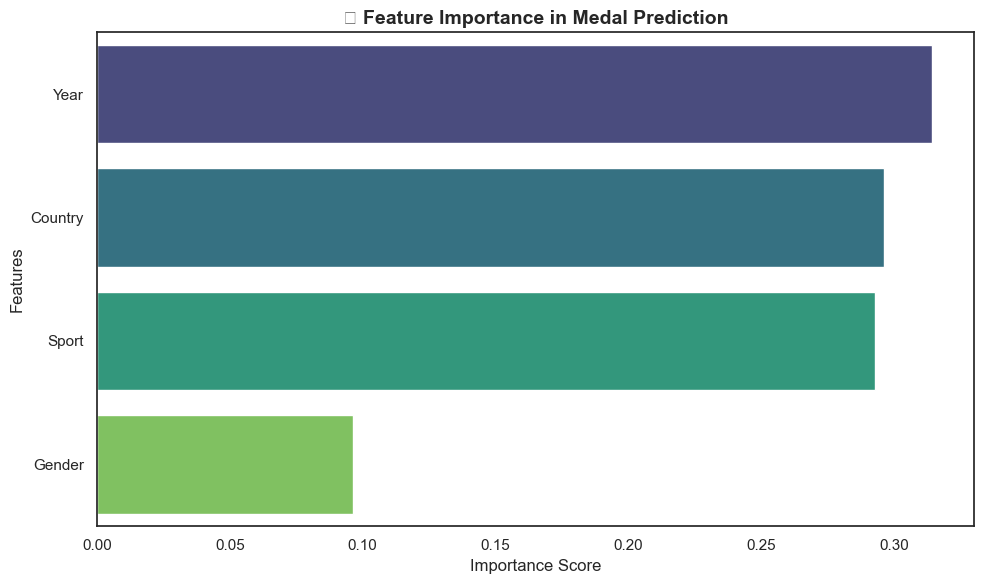

In [ ]:
# Extract feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

# Labels and title
plt.title("🎯 Feature Importance in Medal Prediction", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



## Step 8: Save the Trained Model

In [16]:
joblib.dump(model, 'olympics_medal_predictor_model.pkl')
print("✅ Model saved as 'olympics_medal_predictor_model.pkl'")

✅ Model saved as 'olympics_medal_predictor_model.pkl'


## Step 9: Key Insights & Takeaways
- USA dominated medal counts in every year.
- Athletics & Swimming are the most medal-rich sports.
- Gender gap is reducing over the years.
- Medal prediction based on year, sport, and country shows decent accuracy.

---